In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importamos las librerias que utilizaremos para esta practica.

In [96]:
basedatos=pd.read_csv("C:/Users/enriq/Desktop/Actuaría Sem 8/Minería de Datos/winemag-data_first150k.csv",encoding="utf8")
basedatos

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Aqui cargamos los datos del archico csv al cual llamaremos basedatos y los visualizamos

In [97]:
basedatoslimpia=basedatos.rename(columns = {'country':'País','winery':'Viñedo','points':'Calificación'})
print(basedatoslimpia['País'].dtype)
print(basedatoslimpia['Viñedo'].dtype)
print(basedatoslimpia['Calificación'].dtype)

object
object
int64


Con estos códigos renombramos a 3 de nuestras columnas, las cuales nos interesan para descubrir que tan buenos son los vinos por país y por viñedo, tambien revisamos los tipos de datos que se encuentran en cada una de ellas. Nos interesan estas 3 columnas para nuestro análisis.

In [98]:
basedatos=basedatoslimpia.drop(["Unnamed: 0","description","designation","price","province","region_1","region_2","variety"],axis=1)
basedatos

,País,Calificación,Viñedo
0,US,96,Heitz
1,Spain,96,Bodega Carmen Rodríguez
2,US,96,Macauley
3,US,96,Ponzi
4,France,95,Domaine de la Bégude
...,...,...,...
150925,Italy,91,Feudi di San Gregorio
150926,France,91,H.Germain
150927,Italy,91,Terredora
150928,France,90,Gosset


Con el ultimo comando eliminamos las columnas que no nos interesan para poder trabajar mejor con los datos de interés.

In [99]:
basedatos.isnull().sum()

País            5
Calificación    0
Viñedo          0
dtype: int64

Buscamos si existen valores nulos en nuestra base de datos ya limpia, al ver que son pocos los valores nulos, eliminaremos estos datos.

In [100]:
basedatos=basedatos.dropna()
basedatos

,País,Calificación,Viñedo
0,US,96,Heitz
1,Spain,96,Bodega Carmen Rodríguez
2,US,96,Macauley
3,US,96,Ponzi
4,France,95,Domaine de la Bégude
...,...,...,...
150925,Italy,91,Feudi di San Gregorio
150926,France,91,H.Germain
150927,Italy,91,Terredora
150928,France,90,Gosset


Vemos que la dimension de nuestra base de datos cambio de 150930 a 150925, ya tenemos nuestra base de datos limpia para empezar a trabajar con ella.

In [44]:
basedatos["Calificación"].mean()

87.88852741427861

In [45]:
basedatos["Calificación"].min()

80

In [46]:
basedatos["Calificación"].max()

100

In [47]:
basedatos["Calificación"].var()

10.383150361887717

Realizamos un pequeño y rapido anàlisis de los datos numericos que tenemos, para ver el rango de los datos, la varianza y la media. Datos muy importantes para nuestro anàlisis.

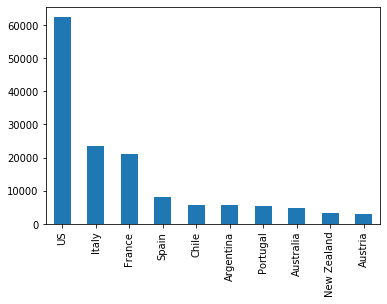

In [49]:
basedatos['País'].value_counts().head(10).plot.bar()

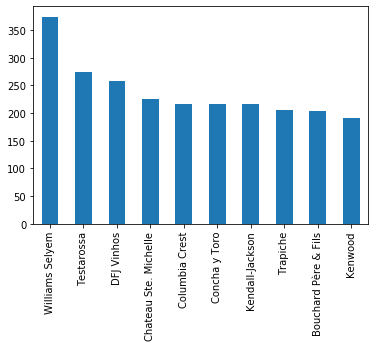

In [50]:
basedatos['Viñedo'].value_counts().head(10).plot.bar()

Estas ultimas 2 gráficas nos ayudan a ver en que viñedos y en que países se distribuye la mayor cantidad de vinos. Vemos que Estados Unidos arrasa en la producción de vinos, pero nos queda la duda de que proporción del mercado abarca. Revisemos:

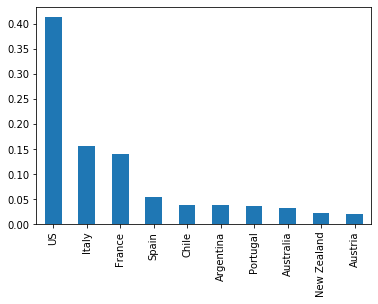

In [51]:
(basedatos['País'].value_counts().head(10)/len(basedatos)).plot.bar()

Esta ultima gráfica nos muestra que Estados Unidos domina poco mas de 40% del total del mercado de vinos. Una cantidad muy importante. Pero el dominar no significa ser el mejor, veamos que país tiene la mejor media en cuanto a la calificación del vino.

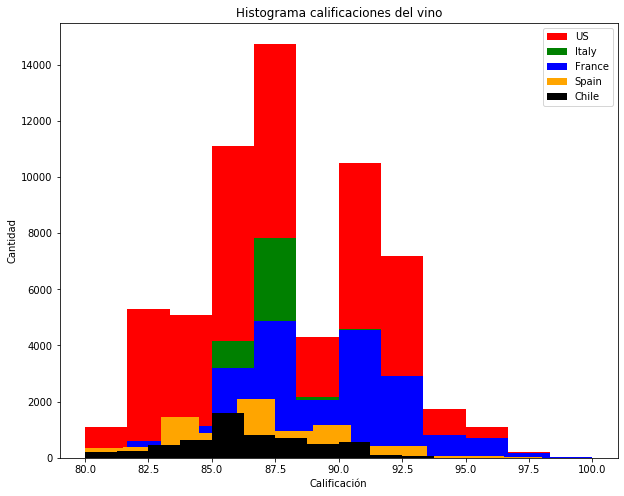

In [123]:
US=basedatos[basedatos.País=='US']
Italy=basedatos[basedatos.País=='Italy']
France=basedatos[basedatos.País=='France']
Spain=basedatos[basedatos.País=='Spain']
Chile=basedatos[basedatos.País=='Chile']


#histograma de medias
plt.figure(figsize=(10, 8))
x=plt.hist(US['Calificación'], 12, 
                            facecolor='red', label='US')
x=plt.hist(Italy['Calificación'], 12, 
                            facecolor='green', label='Italy')
x=plt.hist(France['Calificación'], 12, 
                            facecolor='blue', label='France')
x=plt.hist(Spain['Calificación'], 12, 
                            facecolor='orange', label='Spain')
x=plt.hist(Chile['Calificación'], 12, 
                            facecolor='black', label='Chile')
plt.legend(loc='upper right')
plt.title('Histograma calificaciones del vino')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.show()


Realizamos un histograma con el top 5 de países con mayor producción de vinos. Observamos que la calificación se comporta de manera parecida en los países de Estados Unidos, Francia e Italia. Estos 3 tienen su media por encima de los siguientes países como España y Chile. Con esto podemos decir que a mayor producción, mayor calificación

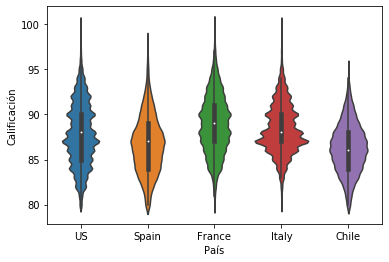

In [135]:
sns.violinplot(
    x='País',
    y='Calificación',
    data=basedatos[basedatos.País.isin(basedatos.País.value_counts()[:5].index)]
)

Seguimos comparando nuestro top 5 países, con el grafico de violines vemos de una forma mas clara como las calificaciones de los vinos españoles y los chilenos se concentran por debajo de los vinos estadounidenses, franceces e italianos. 

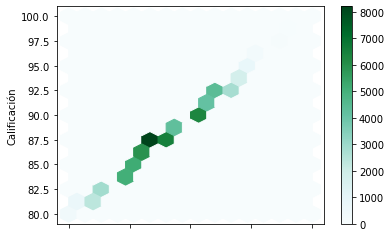

In [130]:
US.plot.hexbin(x='Calificación',y='Calificación', gridsize=15)

Al solo tener una columna numerica, vemos mediante hexplot que nuestra calificación de los vinos en Estados Unidos se concentra entre el 85 y el 90.

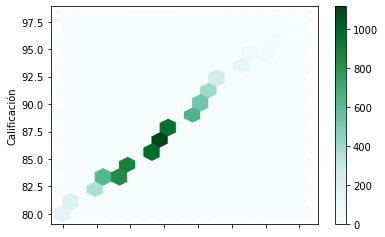

In [131]:
Spain.plot.hexbin(x='Calificación',y='Calificación', gridsize=15)

Al solo tener una columna numerica, vemos mediante hexplot que nuestra calificación de los vinos en España se concentra entre el 85 y el 90.

## Tareas opcionales

- Scatter plot y Hexplot
Ambos comando nos van a generar un grafico el cual nos va a mostrar la cantidad de datos que una variable dependiente puede llegar a tener. Scatter plot nos los va a mostrar de una forma mas desordenada, normalmente se utiliza para revisar si los datos tienen alguna tendencia o estan relacionados, por otra parte, hex plot nos va a mostrar de una forma sencilla la densidad que tienen los datos en la variable dependiente.

- Graficas y sus tipo de datos
Hist plot: de intervalos, nominal u ordinal. El unico tipo de dato que no puede representar un histograma es el de razón, ya que este en el el 0 no tiene valor y el histograma si que lo toma en cuenta.

Scatter plot: de intervalo. Muestra la asociación de estas 2 variables.

Boxplot: al igual que el histograma, puede mostrar datos de intervalos, nominal u ordinal. El unico tipo de dato que no puede representar es el de razón, ya que este en el el 0 no tiene valor y el boxplot si que lo toma en cuenta.

Bar plot: la mejor opción para mostrar tus datos cuando son de razon
